# Notes on Scraping the W3C Mailing Lists

Developer's notes and other miscellaneous observations

---

In [1]:
# setup
import pickle
import matplotlib.pyplot as plt
import seaborn as sns



---

In [13]:
# number of mailing lists
with open("message_numbers_per_list.pkl", "rb") as handle:
    numbers = pickle.load(handle)
print("Numer of mailing lists: ", len(numbers))

Numer of mailing lists:  1597


Total number of e-mails: 1975451
Number of mailing lists with no e-mails:  406


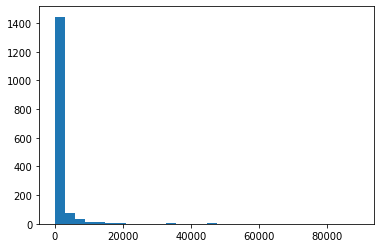

In [16]:
# number of mails per mailing list
total_per_list = [sum(nums) for nums in numbers.values()]
fig = plt.hist(total_per_list, bins=30)
# fig.set_xscale("log"); fig.set_yscale("log")
print("Total number of e-mails:", sum(total_per_list))
print("Number of mailing lists with no e-mails: ", len([t for t in total_per_list if t < 1]))

---

---
# TODOs

 - [ ] server connection via http.client not parallelisable because `TypeError: can't pickle SSLContext objects`
 - [ ] some mailing list links are flawed (parts of the url repeated)

---
## Misc Notes

 - some (at least 1) e-mails are LATIN-1 encoded (decoding to UTF-8 leads to errors)
 - quite a few mailing lists (406) have no e-mails in them
 - each mailing list in divided into time periods; collecting individual time period links "directly" from the list of periods (i.e. the HTML) by regular expression (i.e. not by finding the location in the HTML tree) because that was easier => seems just work
 - server seems to disconnect after too many requests (around 3.5k) => just re-connecting seems to work well
 - server disconnects after 1531 requests (while collecting periods) => catch exception & re-connect